<a href="https://colab.research.google.com/github/atrinasalsabilnengkoda/PCVK_Genap_2021/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow #imagedisplay
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pyplot as plt
import math

 Changing Brightness Imagery 
-----------------------------
Insert Brightness point: 50


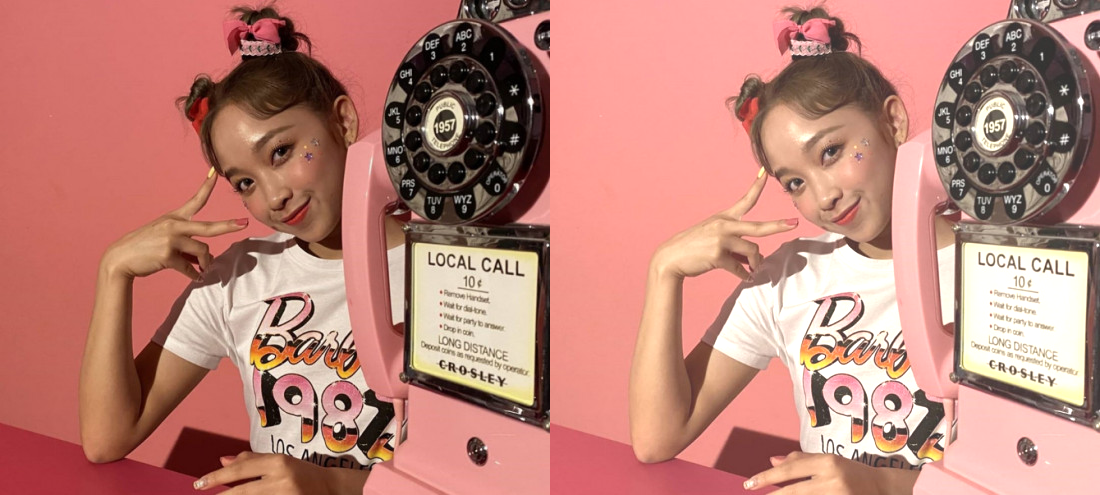

In [7]:
print(' Changing Brightness Imagery ')
print('-----------------------------')
try:
    brightness = int(input('Insert Brightness point: '))
except ValueError:
    print('Error, not a number')

original= cv.imread('/content/drive/MyDrive/PCVK/Images/females.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c]+ brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

 Changing Contrass and Linear Brightness Imagery 
-----------------------------
Input brightness value (-255 until 255) : 60
Input contrass value (1.0 until 3.0): 1.5


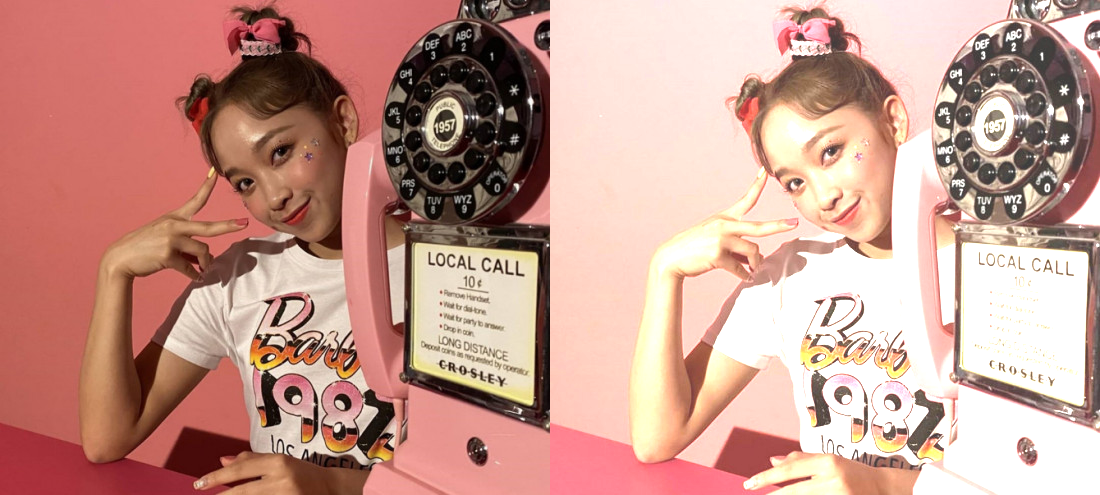

In [10]:
print(' Changing Contrass and Linear Brightness Imagery ')
print('-----------------------------')
try:
  brightness = int(input('Input brightness value (-255 until 255) : '))
  contrass = float(input('Input contrass value (1.0 until 3.0): '))
except ValueError:
    print('Error, not a number')

original= cv.imread('/content/drive/MyDrive/PCVK/Images/females.jpg')
contrass_brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrass_brightness_image[y,x,c] = np.clip(contrass * original[y,x,c]+ brightness, 0, 255)

final_frame = cv.hconcat((original, contrass_brightness_image))
cv2_imshow(final_frame)

 Changing Brightness Imagery using Log Transformation 
-----------------------------
Input brightness value (-255 until 255) : 40


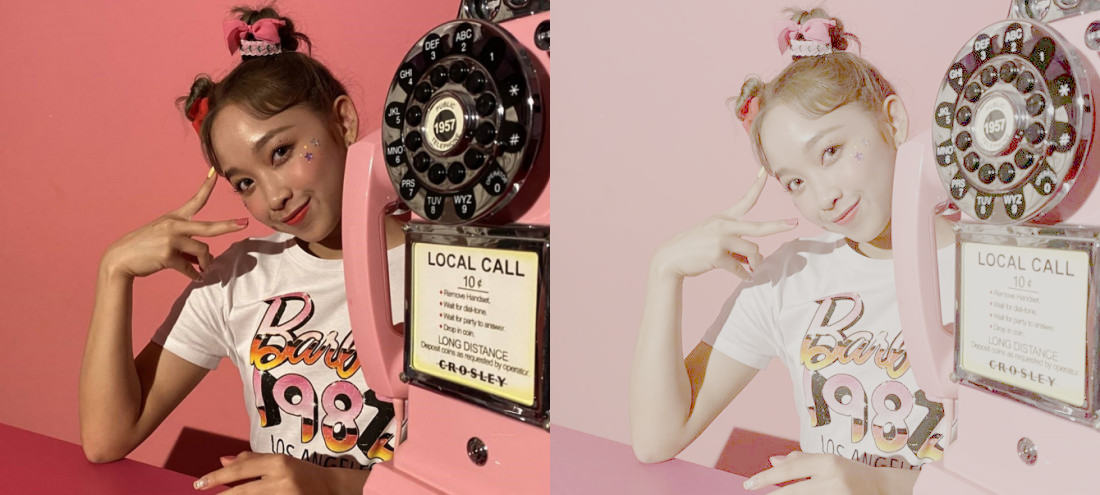

In [14]:
print(' Changing Brightness Imagery using Log Transformation ')
print('-----------------------------')
try:
  brightness = int(input('Input brightness value (-255 until 255) : '))
except ValueError:
    print('Error, not a number')

original= cv.imread('/content/drive/MyDrive/PCVK/Images/females.jpg')
log_brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      log_brightness_image[y,x,c] = np.clip(brightness * math.log(1 + original[y,x,c]), 0,255)

final_frame = cv.hconcat((original, log_brightness_image))
cv2_imshow(final_frame)

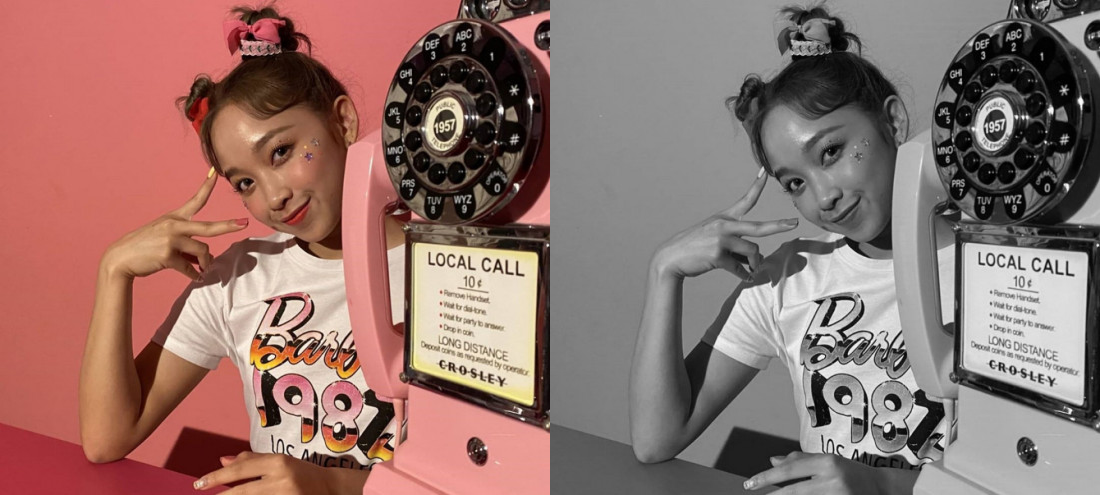

In [16]:
# Averaging
Averaging_image = cv.cvtColor(original, cv.COLOR_BGR2RGB)
Averaging_image[:] = original.mean(axis=-1, keepdims=1)
final_frame = cv.hconcat((original, Averaging_image))
cv2_imshow(final_frame)

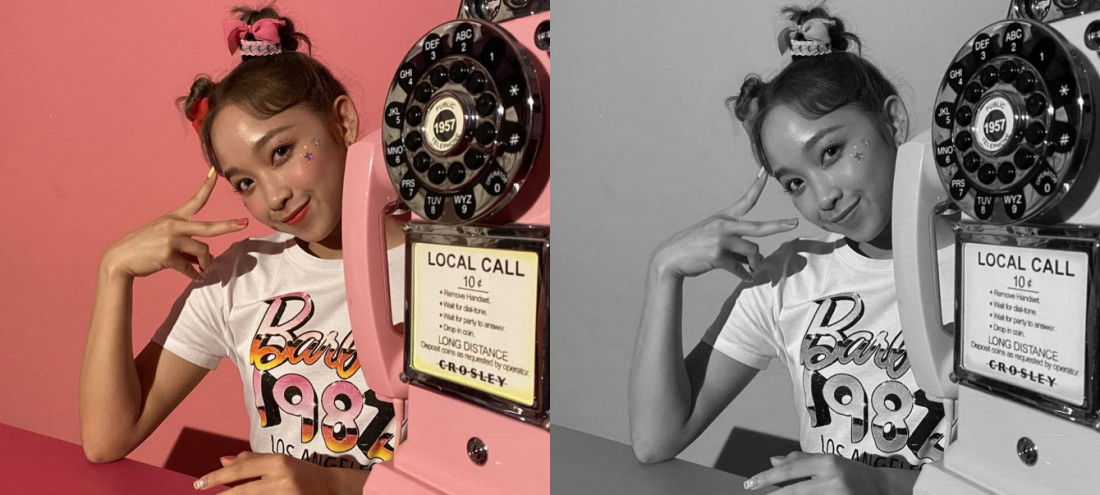

In [17]:
# Lightness
Lightness_image = cv.cvtColor(original, cv.COLOR_BGR2RGB)
Lightness_image[:] = np.max(original, axis=-1, keepdims=1) / 2 + np.min(original, axis=-1, keepdims=1) / 2
final_frame = cv.hconcat((original, Lightness_image))
cv2_imshow(final_frame)

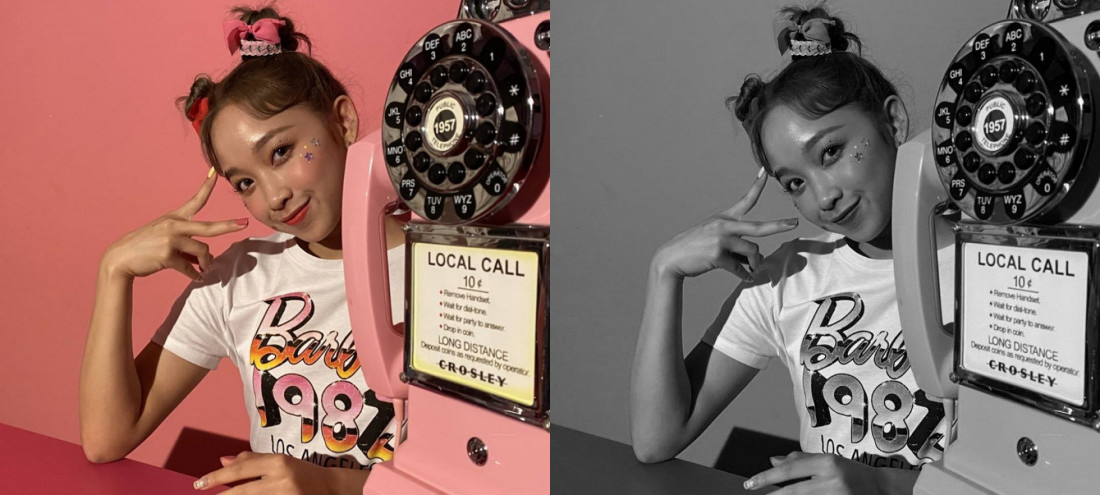

In [18]:
# Luminance
Luminance_image = cv.cvtColor(original, cv.COLOR_BGR2RGB)
W = [0.21, 0.72, 0.07]
W_mean = np.tensordot(original, W, axes=((-1, -1)))[..., None]
Luminance_image[:] = W_mean.astype(original.dtype)
final_frame = cv.hconcat((original, Luminance_image))
cv2_imshow(final_frame)

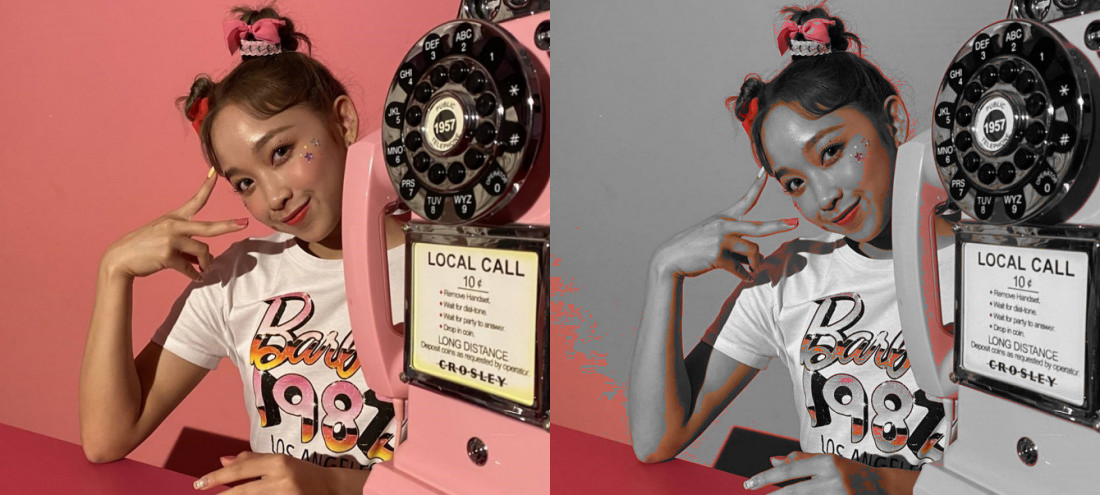

In [31]:
new_image = np.zeros(original.shape, original.dtype)
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    if original[y,x,2] >= 100 and original[y,x,1]<100:
      new_image[y,x] = original[y,x]
    else:
      new_image[y,x] = np.array(np.sum(original[y,x])/3)
final_frame = cv.hconcat((original, new_image))
cv2_imshow(final_frame)